# Neural Breakout sEMG analysis.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [47]:
df = pd.read_csv("LargerMovement.csv")
df.columns = ['One', 'Two', 'Three', "Four", "Five", "Six", "Seven", "Eight", "Rect"]
#df.to_csv("testing_data2.csv", index=False)

In [48]:
df.head()

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect
0,-2.0,0.0,13.0,6.0,1.0,3.0,2.0,0.0,720.0
1,2.0,-3.0,-2.0,3.0,1.0,0.0,2.0,4.0,720.0
2,-3.0,-2.0,-3.0,-5.0,-2.0,-2.0,-1.0,-3.0,720.0
3,2.0,-1.0,-6.0,-4.0,-4.0,-5.0,-3.0,0.0,720.0
4,0.0,-1.0,-6.0,-2.0,-2.0,-4.0,-3.0,-2.0,720.0


In [49]:
df['Rect'] = df['Rect'] / max(df['Rect'])

In [50]:
df.describe()

,One,Two,Three,Four,Five,Six,Seven,Eight,Rect
count,11457.000000,11457.000000,11457.000000,11457.000000,11457.000000,11457.000000,11457.000000,11457.000000,11457.000000
mean,-0.765907,-0.870036,-0.748451,-0.757354,-0.870036,-0.841145,-0.793140,-0.788688,0.503989
std,4.156003,10.399012,21.253161,10.000713,4.011500,6.554782,5.027072,6.828566,0.289081
min,-45.000000,-114.000000,-128.000000,-122.000000,-42.000000,-39.000000,-23.000000,-55.000000,0.000000
25%,-3.000000,-5.000000,-10.000000,-5.000000,-3.000000,-5.000000,-4.000000,-4.000000,0.250000
50%,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.507143
75%,1.000000,3.000000,10.000000,4.000000,1.000000,3.000000,2.000000,2.000000,0.757143
max,35.000000,90.000000,127.000000,120.000000,32.000000,42.000000,22.000000,39.000000,1.000000


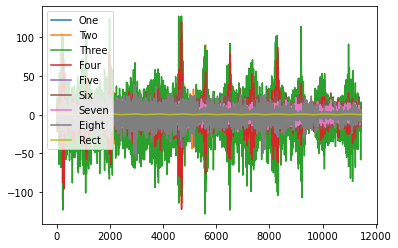

In [51]:
df.plot()

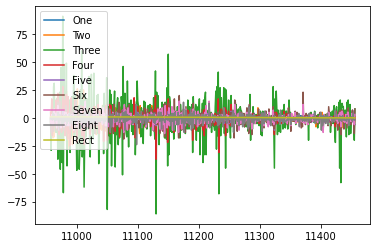

In [52]:
df.tail(500).plot()

We can see very large values for data with an index of over 9100. 

In [10]:
df[df.index > 9100].std()

One       1.828879
Two       3.531027
Three    10.244366
Four      3.713392
Five      2.328403
Six       3.519385
Seven     3.086908
Eight     1.926140
Rect      0.299884
dtype: float64

In [11]:
df[df.index < 9100].std()

One      2.000093
Two      3.460466
Three    9.945206
Four     3.721618
Five     2.345691
Six      3.170862
Seven    2.852231
Eight    1.972526
Rect     0.287196
dtype: float64

To stop the press, I had to press the spacebar. I believe readings after 9100, were from me pressing the spacebar and therefore can be removed.

In [10]:
df = df[df.index < 9100]

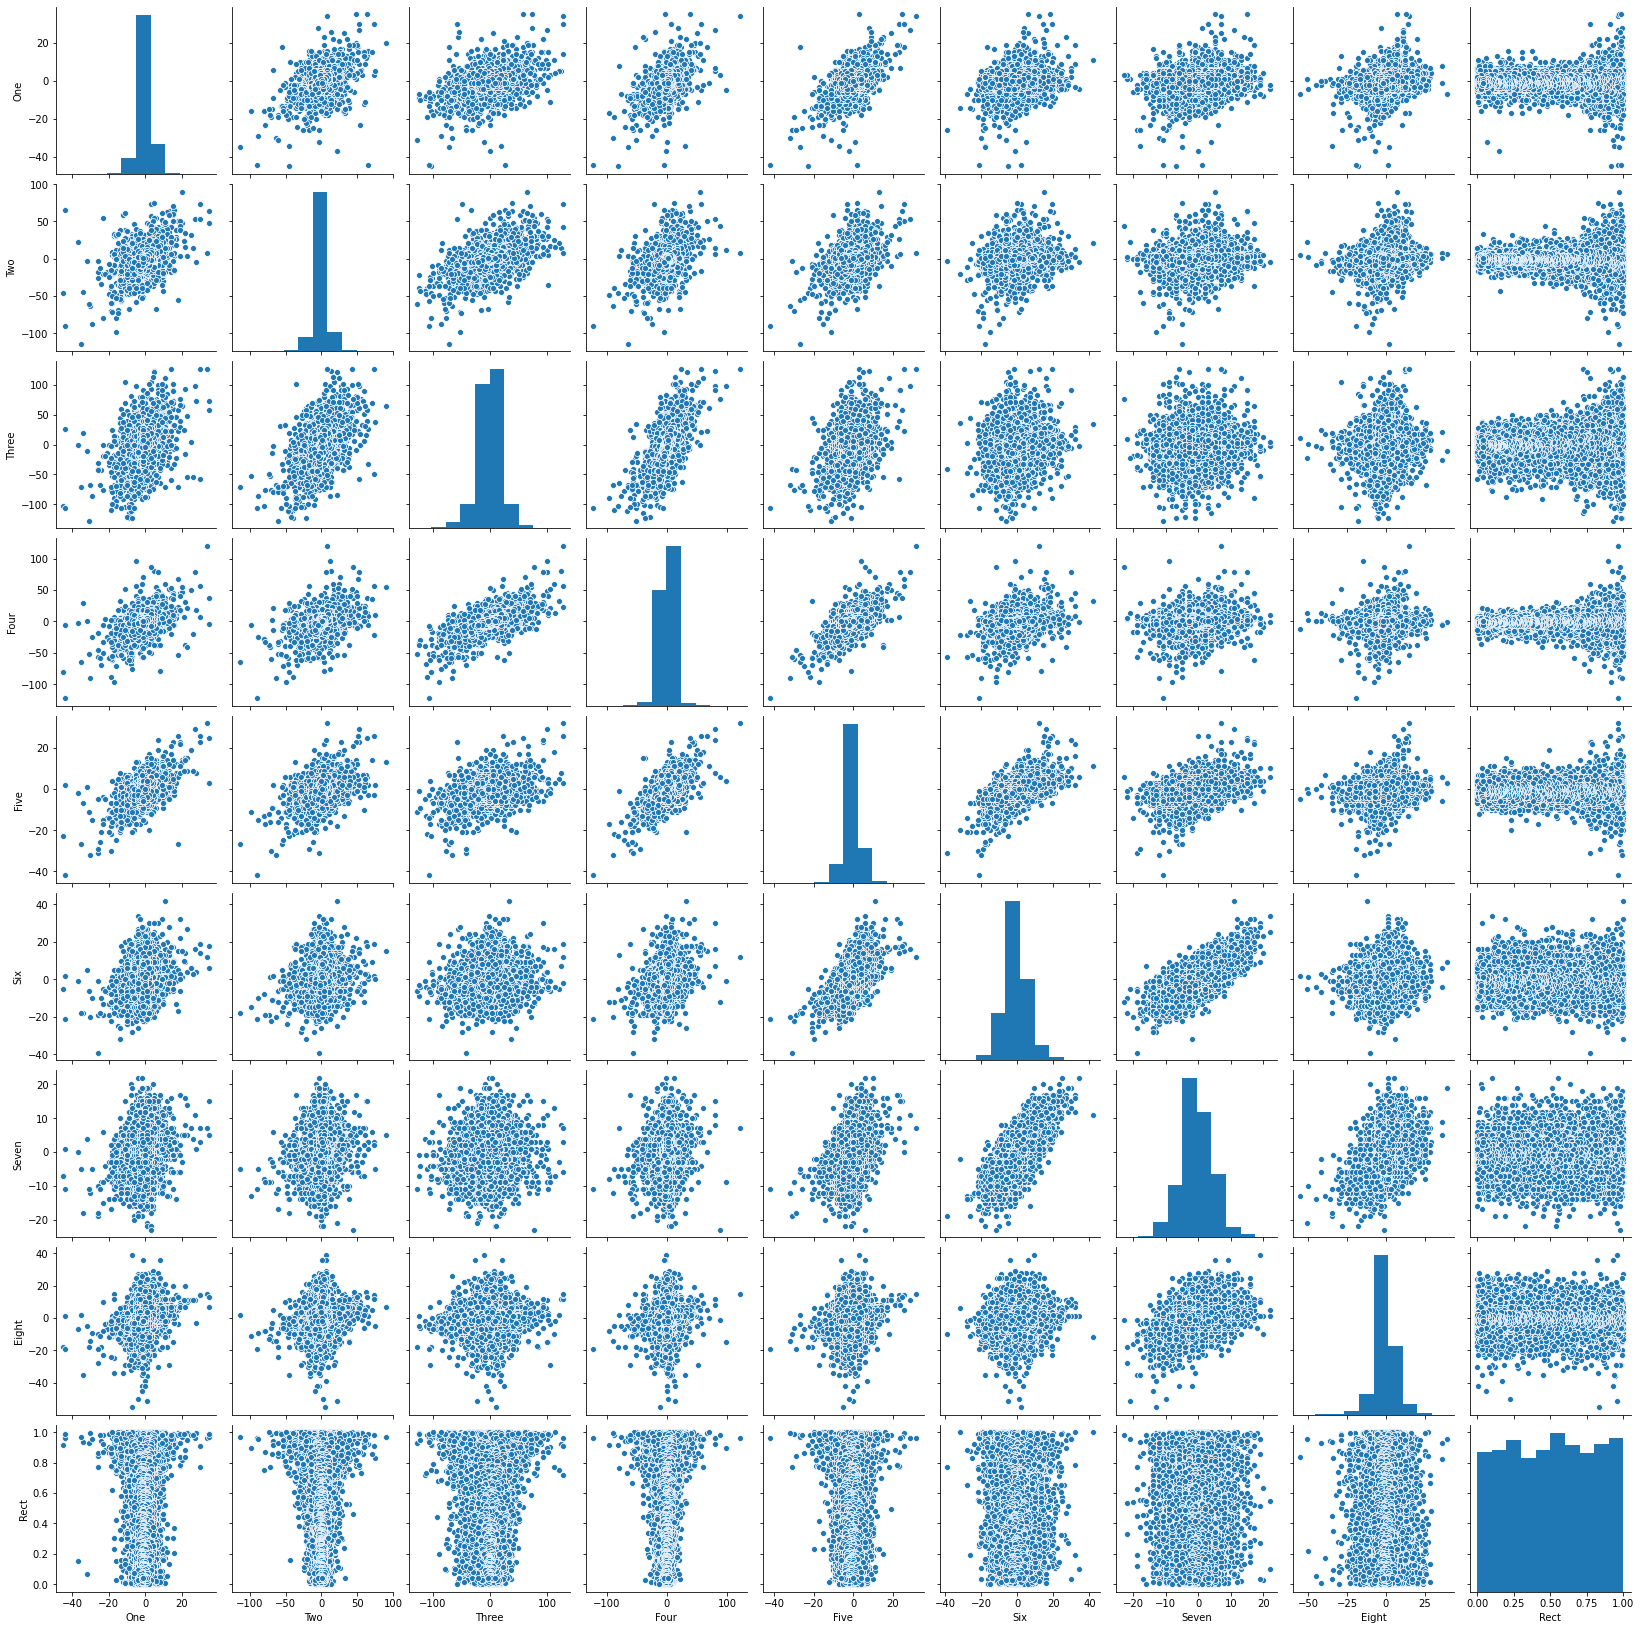

In [53]:
sns.pairplot(df)

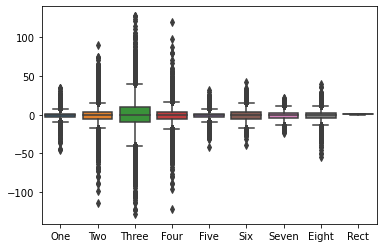

In [56]:
sns.boxplot(data=df)

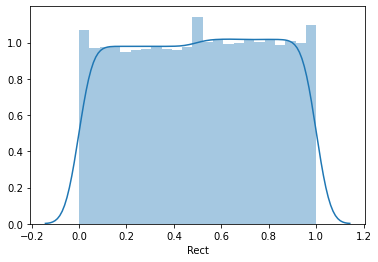

In [57]:
sns.distplot(df['Rect'])

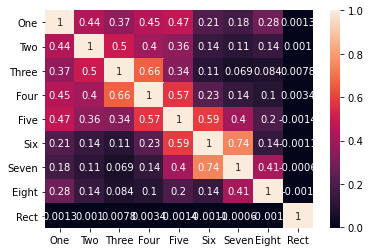

In [58]:
sns.heatmap(df.corr(), annot=True)

## PCA

In [59]:
X = df.drop(['Rect'],1).values
y = df['Rect'].values

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

In [61]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7
count,1.145700e+04,1.145700e+04,1.145700e+04,1.145700e+04,1.145700e+04,1.145700e+04,1.145700e+04,1.145700e+04
mean,-4.739791e-18,-1.193608e-17,4.767166e-17,-2.651279e-17,-4.980838e-17,1.712672e-16,1.004889e-17,-1.424965e-17
std,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00
min,-1.064389e+01,-1.087939e+01,-5.987679e+00,-1.212393e+01,-1.025346e+01,-5.821784e+00,-4.417647e+00,-7.939248e+00
25%,-5.375815e-01,-3.971670e-01,-4.353213e-01,-4.242529e-01,-5.309877e-01,-6.345042e-01,-6.379460e-01,-4.702967e-01
50%,-5.632886e-02,-1.249829e-02,3.521751e-02,7.573326e-02,-3.239932e-02,-2.423601e-02,-4.115109e-02,-3.094663e-02
75%,4.249238e-01,3.721704e-01,5.057563e-01,4.757222e-01,4.661890e-01,5.860322e-01,5.556438e-01,4.084034e-01
max,8.606218e+00,8.738715e+00,6.011060e+00,1.207540e+01,8.194309e+00,6.536147e+00,4.534277e+00,5.827054e+00


In [62]:
principal_df['Y'] = df['Rect']

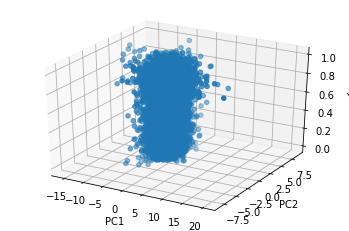

In [63]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], principal_df['Y'])
threedee.set_xlabel('PC1')
threedee.set_ylabel('PC2')
threedee.set_zlabel('Y')
plt.show();

In [64]:
pca.explained_variance_ratio_

array([0.4116453 , 0.20639799])

## The dimention with the greatest variance

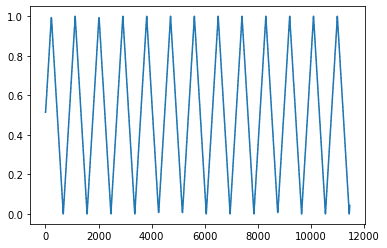

In [65]:
df['Rect'].plot()

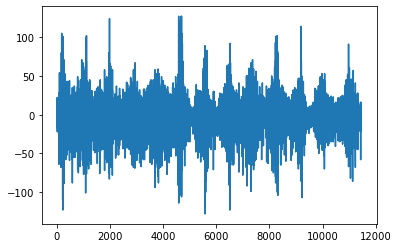

In [66]:
df['Three'].plot()

In [67]:
simple_df = df[['Three','Rect']]
simple_df['Three']

0        13.0
1        -2.0
2        -3.0
3        -6.0
4        -6.0
         ... 
11452     6.0
11453     3.0
11454    -4.0
11455   -20.0
11456     8.0
Name: Three, Length: 11457, dtype: float64

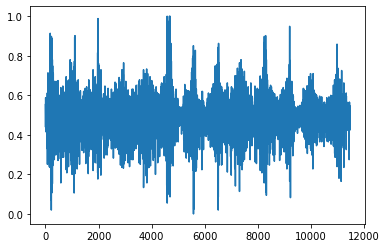

In [68]:
normalized_df=(df['Three']-df['Three'].min())/(df['Three'].max()-df['Three'].min())
normalized_df.plot()

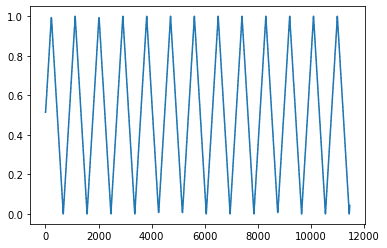

In [69]:
df['Rect'].plot()

# Min Max Scaling 

In [70]:
from sklearn import preprocessing
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_s = pd.DataFrame(x_scaled)

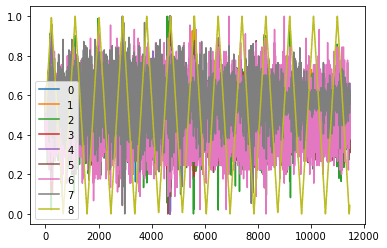

In [71]:
df_s.plot()

## Which channel explains swiping left?

In [72]:
left = df[df['Rect'] < 0.5]
right = df[df['Rect'] < 0.5]

left_s = df_s[df['Rect'] < 0.5]
right_s = df_s[df['Rect'] < 0.5]

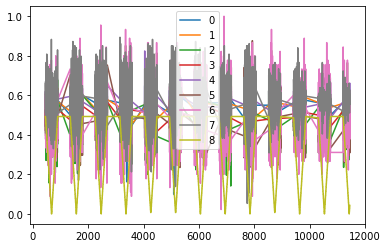

In [73]:
left_s.plot()

In [74]:
right_s.describe()

,0,1,2,3,4,5,6,7,8
count,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000
mean,0.552788,0.554434,0.498529,0.500863,0.555878,0.471171,0.493603,0.576778,0.247366
std,0.038318,0.028440,0.058235,0.024006,0.045465,0.074586,0.105633,0.076316,0.143686
min,0.100000,0.343137,0.141176,0.338843,0.297297,0.160494,0.022222,0.053191,0.000000
25%,0.537500,0.539216,0.474510,0.487603,0.527027,0.432099,0.422222,0.542553,0.121429
50%,0.550000,0.553922,0.501961,0.500000,0.554054,0.469136,0.488889,0.574468,0.250000
75%,0.575000,0.568627,0.529412,0.516529,0.581081,0.506173,0.555556,0.617021,0.371429
max,0.762500,0.774510,0.698039,0.603306,0.824324,0.901235,1.000000,0.893617,0.492857


In [75]:
left_s.var()

0    0.001468
1    0.000809
2    0.003391
3    0.000576
4    0.002067
5    0.005563
6    0.011158
7    0.005824
8    0.020646
dtype: float64

Channel 6 has the highest variance for left rotations. 

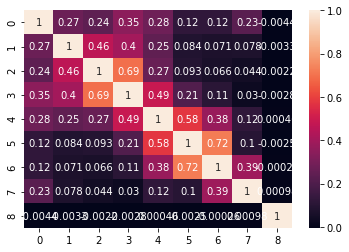

In [76]:
%matplotlib inline
sns.heatmap(left_s.corr(), annot=True)

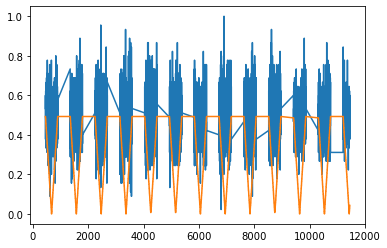

In [77]:
plt.plot(left_s[6])
plt.plot(left_s[8])

# Making a bench mark model

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
simple_model_preds = df['Three'] / max(df['Three'])

In [80]:
simple_model_preds

0        0.102362
1       -0.015748
2       -0.023622
3       -0.047244
4       -0.047244
           ...   
11452    0.047244
11453    0.023622
11454   -0.031496
11455   -0.157480
11456    0.062992
Name: Three, Length: 11457, dtype: float64

In [81]:
mae = metrics.mean_absolute_error(df['Rect'], simple_model_preds)
mse = metrics.mean_squared_error(df['Rect'], simple_model_preds)
rmse = np.sqrt(metrics.mean_squared_error(df['Rect'], simple_model_preds))
r2_square = metrics.r2_score(df['Rect'], simple_model_preds)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)

MAE: 0.5136819307641532
MSE: 0.3707933216919172
RMSE: 0.6089280102704401
R2 Square -3.4374217373874103


## Making a benchmark Linear Regression model

In [82]:
lin_reg = LinearRegression(normalize=False)
lin_reg.fit(X_train,y_train)

LinearRegression()

In [83]:
pred = lin_reg.predict(X_test)

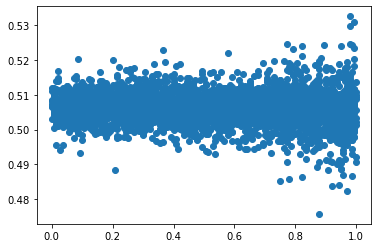

In [84]:
plt.figure()
plt.scatter(y_test.reshape(-1,1), pred.reshape(-1,1))

In [85]:
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
r2_square = metrics.r2_score(y_test, pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)

MAE: 0.25054155661197464
MSE: 0.08401236727669883
RMSE: 0.2898488697178218
R2 Square -0.00249675674465899


# Ridge Regression

In [86]:
from sklearn.linear_model import Ridge

# Split our data into features and what we want to predict
X = df.drop(['Rect'],1).values.astype(float)
y = df['Rect'].values.astype(float)

ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

# Use our model to make predictions
pred = ridge_model.predict(X_test)

# Calculate our metrics
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
r2_square = metrics.r2_score(y_test, pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)

MAE: 0.2505415535619953
MSE: 0.0840123653444326
RMSE: 0.2898488663845912
R2 Square -0.0024967336874510693


In [87]:
ridge_model.coef_

array([-6.15846046e-04,  3.16431293e-04,  3.13066865e-05, -3.52704516e-04,
        1.10187512e-03,  8.80263566e-05, -2.88301887e-04, -3.64618789e-05])